<a href="https://colab.research.google.com/github/CodingCat-Jung/SmartCity/blob/main/SmartCity2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

            출발_도착   총_승객수
378  서울시외 -> 서울시외  536505
0      강남구 -> 강남구  355599
486    송파구 -> 송파구  348324
108    관악구 -> 관악구  336555
81     강서구 -> 강서구  304891
405    서초구 -> 서초구  266265
594    은평구 -> 은평구  253911
324    마포구 -> 마포구  245721
648      중구 -> 중구  223959
216    노원구 -> 노원구  215206


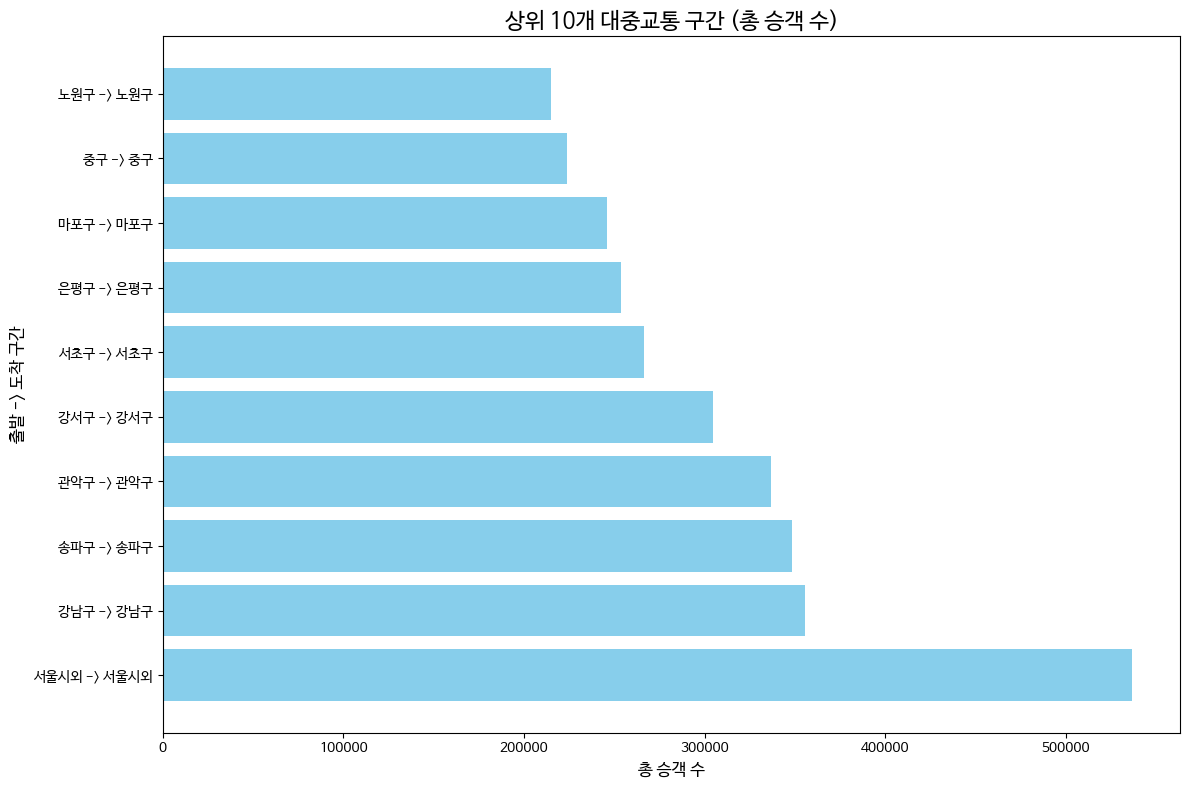

In [ ]:
# 서울시 대중교통 행정구역별 이용 통계

import pandas as pd
import matplotlib.pyplot as plt

# 데이터 불러오기
df1001 = pd.read_csv('동별_목적OD_20241001.csv', encoding='cp949')
df1002 = pd.read_csv('동별_목적OD_20241002.csv', encoding='cp949')
df1003 = pd.read_csv('동별_목적OD_20241003.csv', encoding='cp949')

# 데이터 병합
df_combined = pd.concat([df1001, df1002, df1003])

# 출발_구와 도착_구를 기준으로 총_승객수 합산
df_combined['출발_도착'] = df_combined['출발_구'] + ' -> ' + df_combined['도착_구']  # 출발 -> 도착 구간을 하나의 컬럼으로 합침

# 출발_도착 구간별로 총_승객수 합산
df_grouped = df_combined.groupby('출발_도착')['총_승객수'].sum().reset_index()

# 총_승객수 기준으로 내림차순 정렬
df_sorted = df_grouped.sort_values(by='총_승객수', ascending=False)

# 결과 출력
print(df_sorted.head(10))  # 상위 10개 구간 출력

# 시각화: 상위 10개 구간의 총 승객 수
plt.figure(figsize=(12, 8))
plt.barh(df_sorted.head(10)['출발_도착'], df_sorted.head(10)['총_승객수'], color='skyblue')
plt.xlabel('총 승객 수', fontsize=12)
plt.ylabel('출발 -> 도착 구간', fontsize=12)
plt.title('상위 10개 대중교통 구간 (총 승객 수)', fontsize=16)
plt.tight_layout()
plt.show()


<ipython-input-3-3e21e9e35edd>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_diff['출발_도착'] = df_diff['출발_구'] + ' -> ' + df_diff['도착_구']  # 출발 -> 도착 구간을 하나의 컬럼으로 합침


           출발_도착   총_승객수
614   중구 -> 서울시외  200144
589  종로구 -> 서울시외  200097
13   강남구 -> 서울시외  196497
373   서울시외 -> 중구  193151
372  서울시외 -> 종로구  191512
350  서울시외 -> 강남구  189612
14    강남구 -> 서초구  182991
375   서초구 -> 강남구  177800
464  송파구 -> 서울시외  173211
367  서울시외 -> 송파구  164966


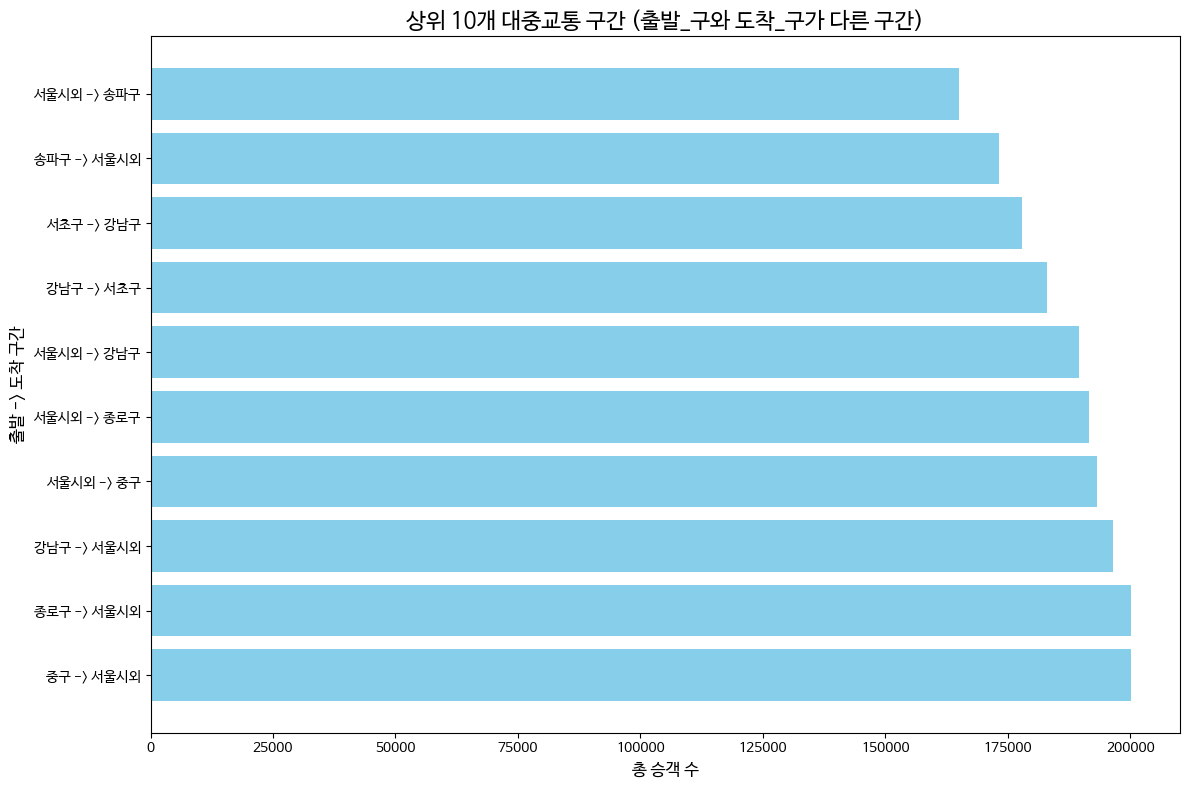

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 불러오기
df1001 = pd.read_csv('동별_목적OD_20241001.csv', encoding='cp949')
df1002 = pd.read_csv('동별_목적OD_20241002.csv', encoding='cp949')
df1003 = pd.read_csv('동별_목적OD_20241003.csv', encoding='cp949')

# 데이터 병합
df_combined = pd.concat([df1001, df1002, df1003])

# 출발_구와 도착_구가 서로 다른 경우만 선택
df_diff = df_combined[df_combined['출발_구'] != df_combined['도착_구']]

# 출발_구와 도착_구를 기준으로 총_승객수 합산
df_diff['출발_도착'] = df_diff['출발_구'] + ' -> ' + df_diff['도착_구']  # 출발 -> 도착 구간을 하나의 컬럼으로 합침

# 출발_도착 구간별로 총_승객수 합산
df_grouped = df_diff.groupby('출발_도착')['총_승객수'].sum().reset_index()

# 총_승객수 기준으로 내림차순 정렬
df_sorted = df_grouped.sort_values(by='총_승객수', ascending=False)

# 결과 출력
print(df_sorted.head(10))  # 상위 10개 구간 출력

# 시각화: 상위 10개 구간의 총 승객 수
plt.figure(figsize=(12, 8))
plt.barh(df_sorted.head(10)['출발_도착'], df_sorted.head(10)['총_승객수'], color='skyblue')
plt.xlabel('총 승객 수', fontsize=12)
plt.ylabel('출발 -> 도착 구간', fontsize=12)
plt.title('상위 10개 대중교통 구간 (출발_구와 도착_구가 다른 구간)', fontsize=16)
plt.tight_layout()
plt.show()